In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv("Rural_Population_Dynamics.csv", skiprows=4)

In [3]:
# Data Cleaning
# Drop unnecessary columns
data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'], inplace=True)

In [4]:
# Data Exploration
# Summary statistics
summary_stats = data.describe()
# Save summary statistics to a file
with open('summary_statistics.txt', 'w') as f:
    f.write(summary_stats.to_string())


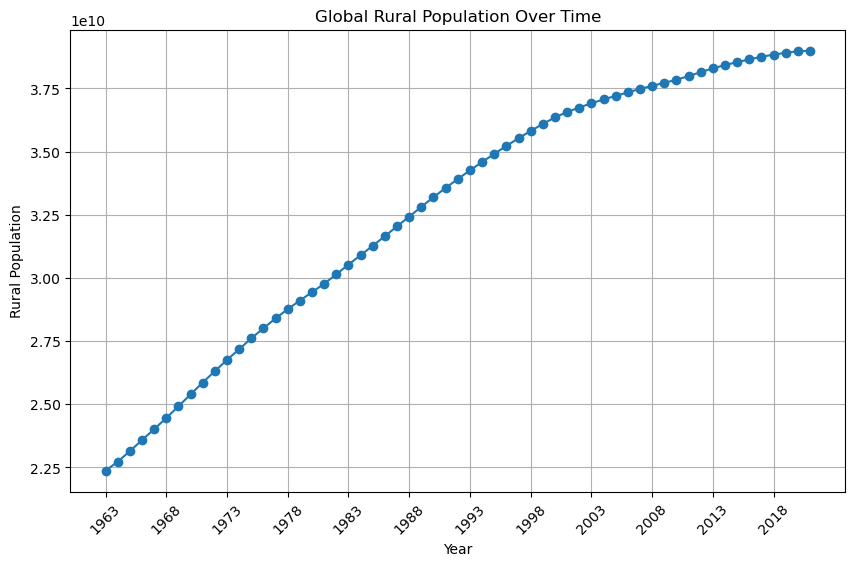

In [5]:
def visualize_global_rural_population_over_time(data):
    """
    Visualizes the global trend of rural population over time.

    Args:
    - data: DataFrame containing rural population data across different years.
    """

    years = data.columns[4:]
    global_rural_population = data[years].sum()

    plt.figure(figsize=(10, 6))
    plt.plot(years, global_rural_population, marker='o', linestyle='-')
    plt.title('Global Rural Population Over Time')
    plt.xlabel('Year')
    plt.ylabel('Rural Population')
    plt.xticks(years[::5], rotation=45)  # setting ticks for every 5 years
    plt.grid(True)
    plt.savefig('line_graph.png') 
    plt.show()

visualize_global_rural_population_over_time(data)

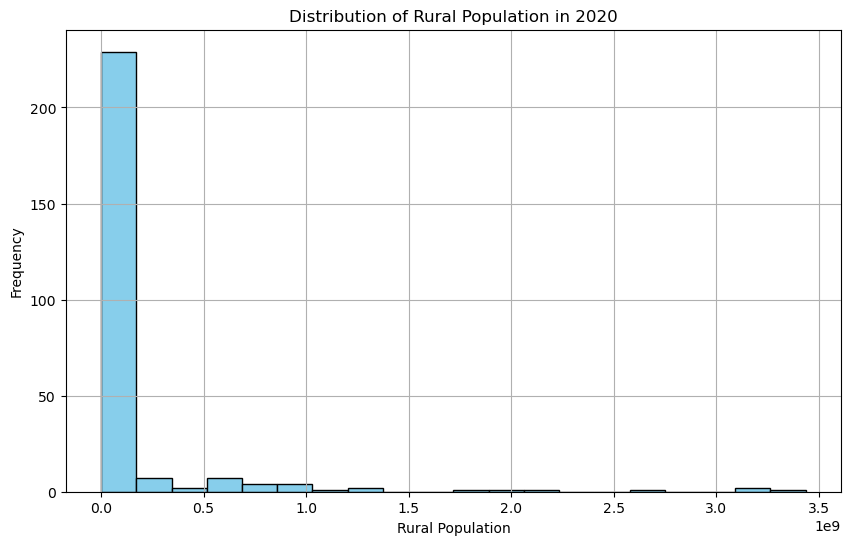

In [6]:
def visualize_rural_population_distribution(data, year):
    """
    Visualizes the distribution of rural population for a specific year.

    Args:
    - data: DataFrame containing rural population data.
    - year: Year for which the distribution is to be visualized (e.g., '2020').
    """

    plt.figure(figsize=(10, 6))
    plt.hist(data[year].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Rural Population in {year}')
    plt.xlabel('Rural Population')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig(f'histogram_{year}.png')
    plt.show()


visualize_rural_population_distribution(data, '2020')


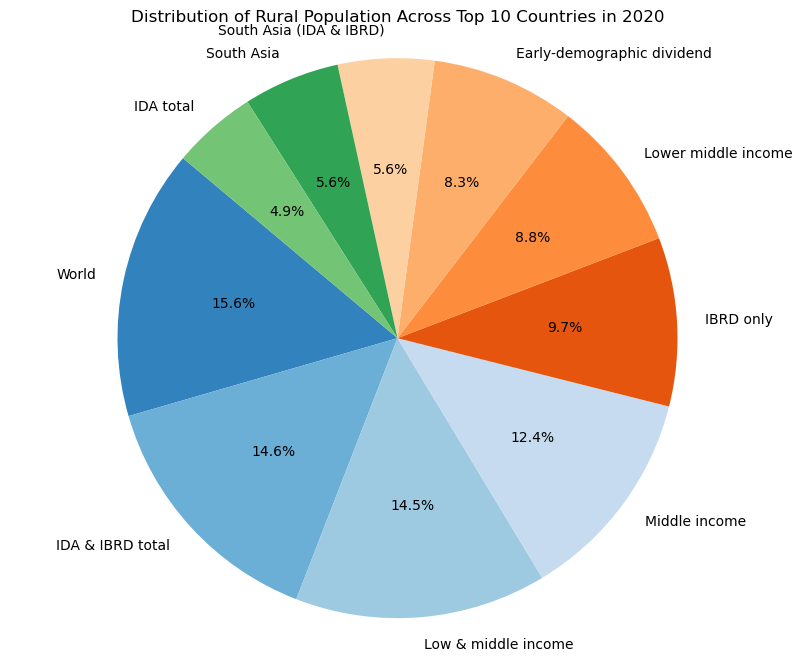

In [7]:

def visualize_top_10_countries_rural_population_2020(data):
    """
    Visualizes the distribution of rural population across the top 10 countries in 2020 using a pie chart.

    Args:
    - data: DataFrame containing rural population data for different countries and years.
    """

    # Get rural population values for the year 2020
    rural_population_2020 = data[['Country Name', '2020']].dropna()

    # Sort countries by rural population in descending order
    rural_population_2020_sorted = rural_population_2020.sort_values(by='2020', ascending=False)

    # Extract top 10 countries with the highest rural population in 2020
    top_10_countries_2020 = rural_population_2020_sorted.head(10)

    # Define a color palette for the pie chart
    colors = plt.cm.tab20c.colors  # Choosing a color palette from matplotlib

    # Plot pie chart for distribution of rural population across top 10 countries in 2020
    plt.figure(figsize=(10, 8))
    plt.pie(top_10_countries_2020['2020'], labels=top_10_countries_2020['Country Name'], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Distribution of Rural Population Across Top 10 Countries in 2020')
    plt.axis('equal') 
    plt.savefig('pie_chart.png')  
    plt.show()

visualize_top_10_countries_rural_population_2020(data)

C:\Users\sridh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


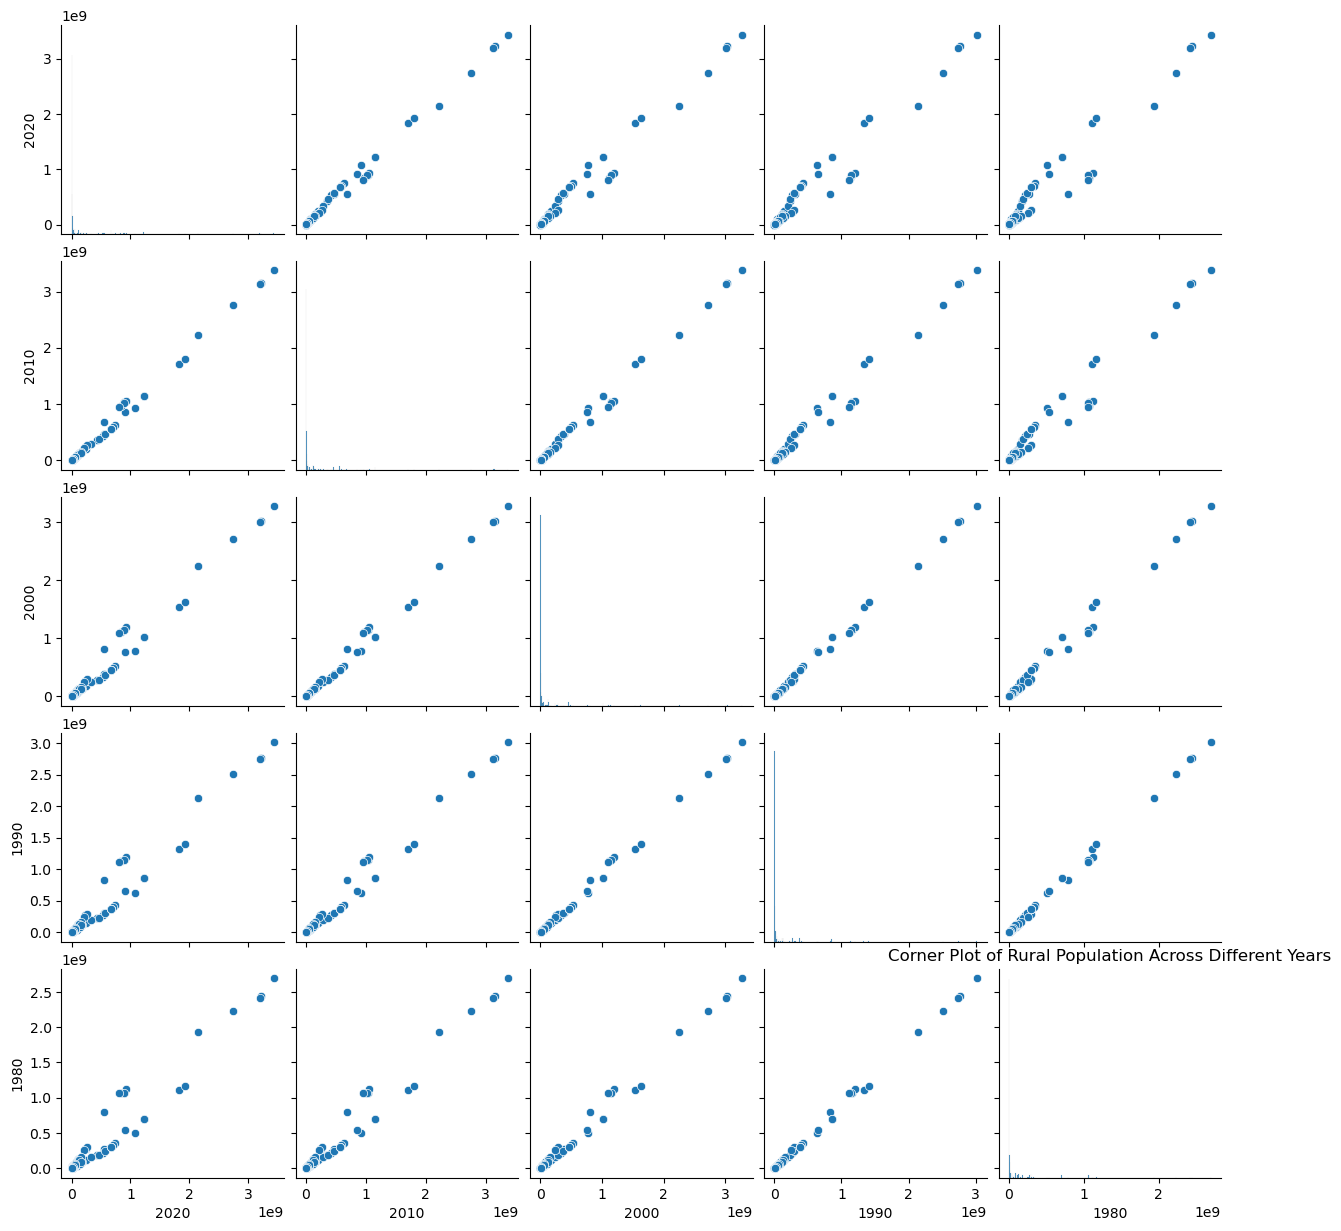

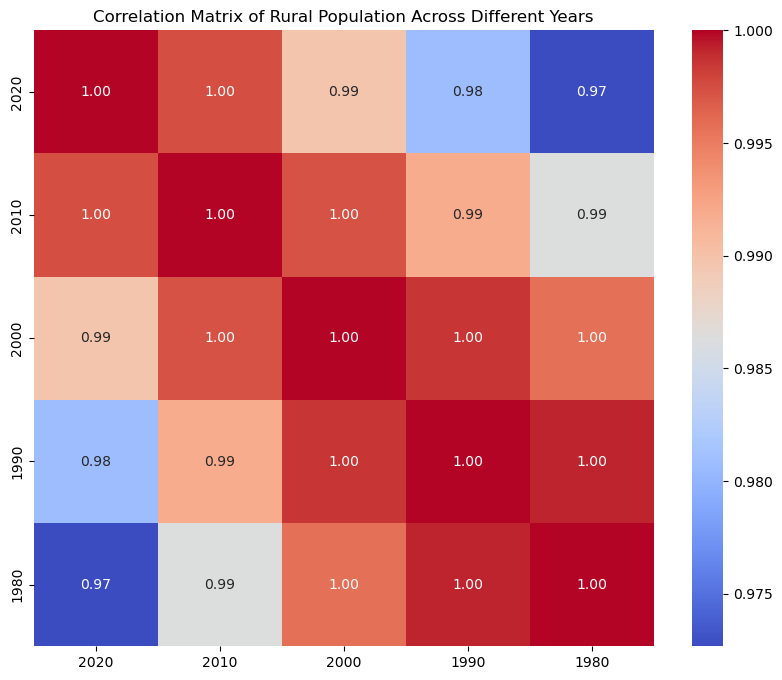

In [8]:
def visualize_corner_plot_rural_population(data, numerical_columns):
    """
    Visualizes the relationships between rural population across different years using a corner plot.

    Args:
    - data: DataFrame containing rural population data for different years.
    - numerical_columns: List of numerical columns (years) to include in the corner plot.
    """

    # Filter the data for the numerical columns
    numerical_data = data[numerical_columns].dropna()

    # Create corner plot
    sns.pairplot(numerical_data)
    plt.title('Corner Plot of Rural Population Across Different Years')
    plt.savefig('corner_plot2.png')  # Save the plot as evidence
    plt.show()

    # Calculate correlation matrix
    correlation_matrix = numerical_data.corr()

    # Visualize correlation matrix using heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Rural Population Across Different Years')
    plt.savefig('correlation_matrix.png') 
    plt.show()

visualize_corner_plot_rural_population(data, ['2020', '2010', '2000', '1990', '1980'])
